# Proyek Machine Learning: Prediksi Pertumbuhan Selada Dengan Random Forest

- **Nama:** Kevin Arnandes
- **Email:** kevinarnandes21@gmail.com
- **ID Dicoding:** kevinarnandes

## Business Understanding

### Problem Statements

- Dalam membandingkan empat algoritma machine learning, yaitu SVM, Random Forest, Gradient Boosting, dan K-Nearest Neighbor, penelitian ini bertujuan untuk menentukan algoritma mana yang memiliki tingkat akurasi yang tinggi dalam memprediksi pertumbuhan selada. Hal ini penting untuk mengetahui algoritma yang paling sesuai untuk digunakan dalam meningkatkan produktivitas pertanian dan kualitas hasil pertumbuhan tanaman.

- Dalam konteks memprediksi pertumbuhan selada, langkah-langkah untuk meningkatkan akurasi model machine learning dapat meliputi pemilihan fitur-fitur yang paling relevan, penyetelan parameter algoritma secara optimal, penggunaan teknik ensemble learning, seperti penggabungan hasil dari beberapa algoritma, serta pengumpulan data yang lebih berkualitas dan representatif. Upaya-upaya ini diharapkan dapat meningkatkan kemampuan model dalam memberikan prediksi yang lebih akurat dan dapat diandalkan terkait pertumbuhan tanaman selada.

## Import Semua Packages/Library yang Digunakan

In [38]:
"""Data Preparation Library"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
import numpy as np

"""Models Library"""
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

"""Model Evaluation"""
from sklearn.model_selection import cross_val_score
from tabulate import tabulate

"""Other"""
import warnings
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category = ConvergenceWarning)

## Data Wrangling

### Gathering Data

In [23]:
# Load Dataset
url = "https://raw.githubusercontent.com/Vinzzztty/playground-data-analyst/main/Machine%20Learning%20Terapan/2.%20Sentiment%20Analysis/dataset/dataset_selada.csv"
df = pd.read_csv(url)

df.head(5)

,Jam,temperature,humidity,light,pH,EC,TDS,WaterTemp,Label,Pattern
0,15.15,25.5,67,17660,6.4,855,427,29.7,Selada,1
1,17.22,26.9,80,86930,6.7,929,464,27.0,Selada,1
2,7.33,25.7,77,23320,6.1,900,449,25.4,Selada,1
3,9.18,26.6,69,32280,6.7,887,443,26.1,Selada,1
4,10.39,25.8,65,41750,6.6,967,482,25.7,Selada,1


In [60]:
df.sample(5)

,temperature,humidity,light,pH,EC,TDS,WaterTemp,Pattern
1317,25.5,83,18760,6.7,1708,854,31.2,1
3148,24.8,65,56900,6.7,1702,851,24.8,2
4258,24.3,99,32820,6.6,2976,1488,27.8,3
1611,25.8,82,28850,6.5,1710,855,27.5,1
402,25.6,78,51170,6.2,1797,890,24.0,1


In [24]:
# Melihat baris dari terakhir pada dataframe

df.tail()

,Jam,temperature,humidity,light,pH,EC,TDS,WaterTemp,Label,Pattern
5000,11.09,28.4,82,17310,6.5,2798,1399,28.8,Selada,3
5001,12.11,24.3,52,17610,6.7,2792,1396,25.2,Selada,3
5002,13.16,31.2,80,2031,6.5,2956,1478,24.8,Selada,3
5003,14.09,24.2,99,111300,6.1,2946,1473,26.0,Selada,3
5004,15.15,27.8,83,21850,6.6,3044,1522,22.9,Selada,3


### Assessing Data

In [ ]:
# Show Column in dataframe
df.columns

Index(['Jam', 'temperature', 'humidity', 'light', 'pH', 'EC', 'TDS',
       'WaterTemp', 'Label', 'Pattern'],
      dtype='object')

In [ ]:
# Cek tipe data dari dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5005 entries, 0 to 5004
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Jam          5005 non-null   float64
 1   temperature  5005 non-null   float64
 2   humidity     5005 non-null   int64  
 3   light        5005 non-null   int64  
 4   pH           5005 non-null   float64
 5   EC           5005 non-null   int64  
 6   TDS          5005 non-null   int64  
 7   WaterTemp    5005 non-null   float64
 8   Label        5005 non-null   object 
 9   Pattern      5005 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 391.1+ KB


Dari output terlihat bahwa:
- Terdapat 1 kolom tipe object yaitu Label
- Terdapat 4 kolom numerik dengan tipe data float64 yaitu: Jam, temperature, pH, WaterTemp
- Terdapat 5 kolom numerik edngan tipe data int64 yaitu: humidity, light, EC, TDS, Pattern

In [ ]:
# Cek nilai numerik
df.describe()

,Jam,temperature,humidity,light,pH,EC,TDS,WaterTemp,Pattern
count,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000
mean,12.351025,28.935584,76.700699,34558.569431,6.520300,1675.379421,837.839560,26.296803,2.008791
std,38.150216,75.274318,22.948338,49156.295229,0.262504,728.307725,364.706067,2.368517,0.832927
min,7.180000,21.800000,0.000000,560.000000,5.700000,336.000000,161.000000,3.600000,1.000000
25%,9.320000,24.800000,62.000000,8300.000000,6.400000,1143.000000,571.000000,24.500000,1.000000
50%,11.320000,26.300000,83.000000,18840.000000,6.500000,1587.000000,793.000000,26.100000,2.000000
75%,13.420000,28.000000,99.000000,39420.000000,6.700000,2248.000000,1124.000000,27.500000,3.000000
max,1358.000000,2619.000000,99.000000,702000.000000,7.100000,3178.000000,1934.000000,34.200000,3.000000


#### Cek Missing Value dan data kosong

In [10]:
# Check null data
df.isnull().sum()

Jam            0
temperature    0
humidity       0
light          0
pH             0
EC             0
TDS            0
WaterTemp      0
Label          0
Pattern        0
dtype: int64

In [13]:
# Check NaN data
df.isna().sum()

Jam            0
temperature    0
humidity       0
light          0
pH             0
EC             0
TDS            0
WaterTemp      0
Label          0
Pattern        0
dtype: int64

#### Assessing Specific Column

In [ ]:
# Cek nilai unik pada kolom Label
df['Label'].value_counts()

Label
Selada    5005
Name: count, dtype: int64

In [ ]:
# Melihat nilai unik pada kolom Pattern
df['Pattern'].value_counts()

Pattern
3    1758
1    1714
2    1533
Name: count, dtype: int64

In [6]:
# Filter baris dengan nilai 'temperature' lebih besar dari 100
high_temperature_rows = df[df['temperature'] > 100]

# Tampilkan nilai pada kolom 'temperature' dari baris yang telah difilter
high_temperature_values = high_temperature_rows['temperature']
print("Nilai kolom 'temperature' yang lebih besar dari 100:")
print(high_temperature_values)

Nilai kolom 'temperature' yang lebih besar dari 100:
1873    2619.0
2143    2619.0
2349    1239.0
2419    2619.0
3209    2619.0
Name: temperature, dtype: float64


### Cleaning Data

#### Menangani Kesalahan Penulisan Nilai pada Kolom temperature

In [25]:
# Jika ada baris dengan nilai 'temperature' lebih dari 100.00, lakukan perbaikan
if not high_temperature_rows.empty:
    # Perbaiki nilai 'temperature' dengan membaginya dengan 100
    df.loc[df['temperature'] > 100.00, 'temperature'] /= 100.0

In [9]:
# Cek dataframe apakah nilai temperature sudah benar dengan melihat min dan max
df.describe()

,Jam,temperature,humidity,light,pH,EC,TDS,WaterTemp,Pattern
count,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000
mean,12.351025,26.618332,76.700699,34558.569431,6.520300,1675.379421,837.839560,26.296803,2.008791
std,38.150216,2.416377,22.948338,49156.295229,0.262504,728.307725,364.706067,2.368517,0.832927
min,7.180000,12.390000,0.000000,560.000000,5.700000,336.000000,161.000000,3.600000,1.000000
25%,9.320000,24.800000,62.000000,8300.000000,6.400000,1143.000000,571.000000,24.500000,1.000000
50%,11.320000,26.300000,83.000000,18840.000000,6.500000,1587.000000,793.000000,26.100000,2.000000
75%,13.420000,28.000000,99.000000,39420.000000,6.700000,2248.000000,1124.000000,27.500000,3.000000
max,1358.000000,37.800000,99.000000,702000.000000,7.100000,3178.000000,1934.000000,34.200000,3.000000


#### Handling Outliers

<Axes: xlabel='temperature'>

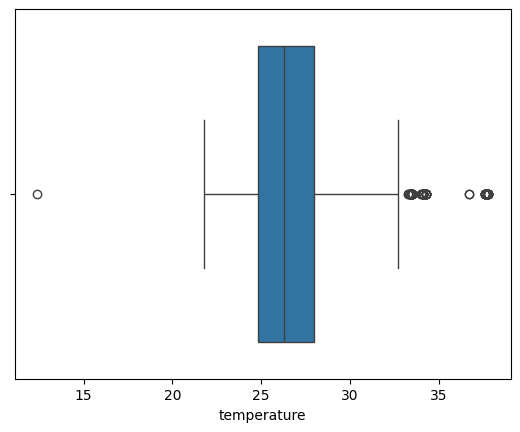

In [14]:
sns.boxplot(x=df['temperature'])

<Axes: xlabel='humidity'>

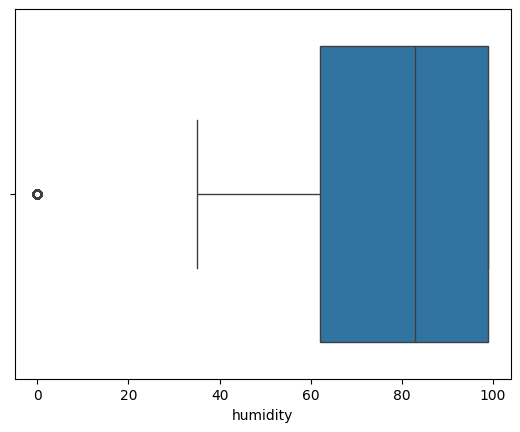

In [15]:
sns.boxplot(x=df['humidity'])

<Axes: xlabel='light'>

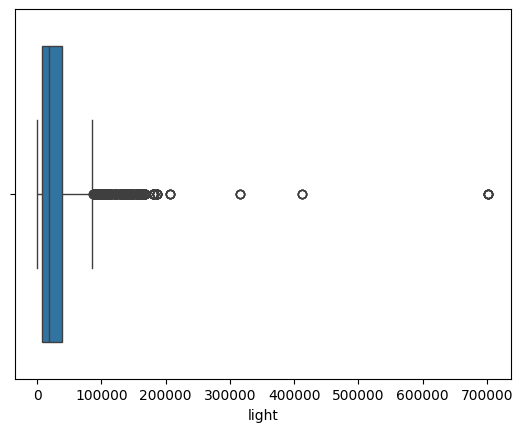

In [16]:
sns.boxplot(x=df['light'])

<Axes: xlabel='pH'>

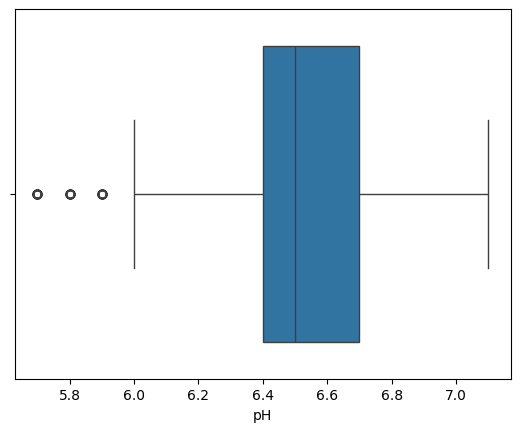

In [17]:
sns.boxplot(x=df['pH'])

<Axes: xlabel='EC'>

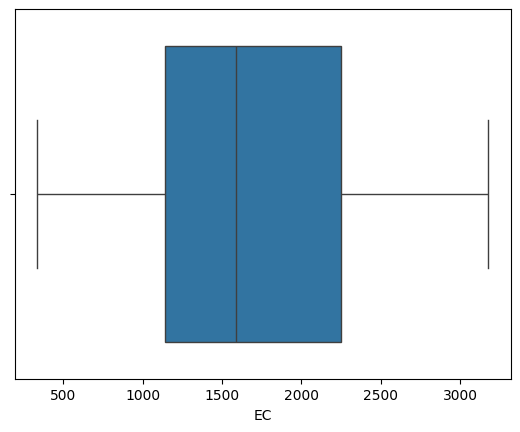

In [18]:
sns.boxplot(x=df['EC'])

<Axes: xlabel='TDS'>

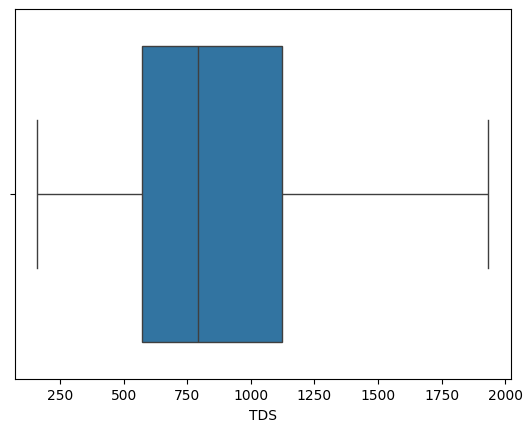

In [19]:
sns.boxplot(x=df['TDS'])

<Axes: xlabel='WaterTemp'>

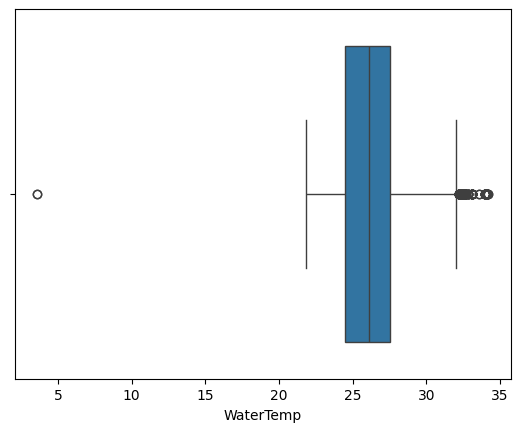

In [20]:
sns.boxplot(x=df['WaterTemp'])

In [26]:
# Tentukan kolom yang akan dipertimbangkan
kolom_yang_dipertimbangkan = ['temperature', 'humidity', 'light', 'pH', 'EC', 'TDS', 'WaterTemp']

# Hitung IQR untuk kolom-kolom yang sudah ditentukan
Q1 = df[kolom_yang_dipertimbangkan].quantile(0.25)
Q3 = df[kolom_yang_dipertimbangkan].quantile(0.75)
IQR = Q3 - Q1

# Filter outlier untuk kolom-kolom yang sudah ditentukan
insurance = df[~((df[kolom_yang_dipertimbangkan] < (Q1 - 1.5 * IQR)) | (df[kolom_yang_dipertimbangkan] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Periksa ukuran dataset setelah menghapus outlier
insurance.shape

(4057, 10)

#### Drop Not Important Column

In [27]:
df = df.drop(columns=['Jam', 'Label'])

df.head()

,temperature,humidity,light,pH,EC,TDS,WaterTemp,Pattern
0,25.5,67,17660,6.4,855,427,29.7,1
1,26.9,80,86930,6.7,929,464,27.0,1
2,25.7,77,23320,6.1,900,449,25.4,1
3,26.6,69,32280,6.7,887,443,26.1,1
4,25.8,65,41750,6.6,967,482,25.7,1


## Exploratory Data Analysis (EDA)

### Melihat Banyak Nilai pada Kolom Pattern

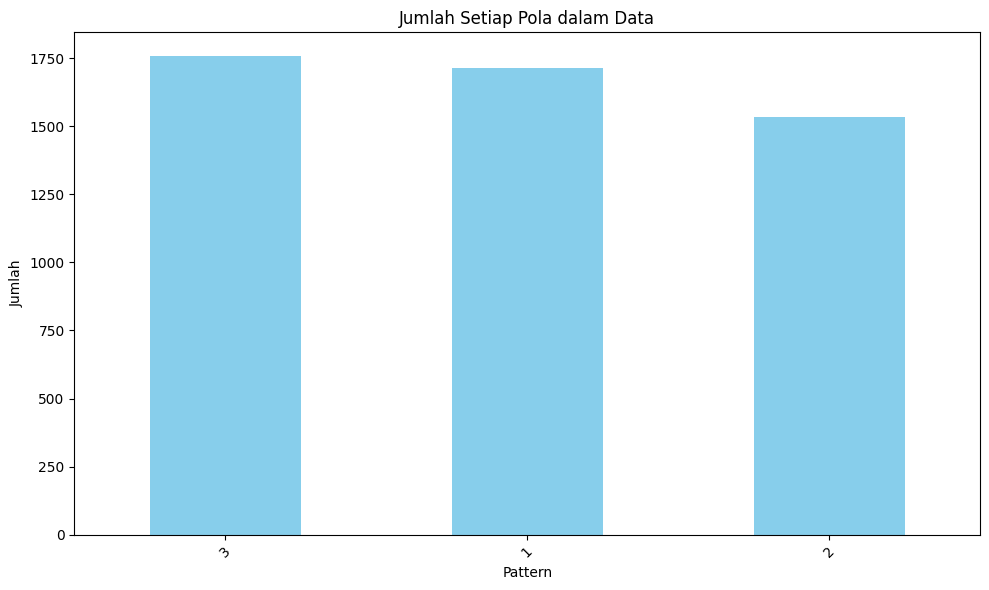

In [28]:
# Hitung jumlah setiap nilai dalam kolom 'Pattern'
pattern_counts = df['Pattern'].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 6))
pattern_counts.plot(kind='bar', color='skyblue')
plt.title('Jumlah Setiap Pola dalam Data')
plt.xlabel('Pattern')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Mencari Korelasi Kolom

In [30]:
# Membuat Matrix Korelasi
cor_matrix = df.corr()
cor_matrix

,temperature,humidity,light,pH,EC,TDS,WaterTemp,Pattern
temperature,1.000000,-0.105658,0.059090,-0.003839,-0.006678,-0.006485,0.162393,0.000317
humidity,-0.105658,1.000000,-0.070975,0.016518,0.045092,0.044673,-0.101836,-0.049649
light,0.059090,-0.070975,1.000000,-0.027438,0.013735,0.012359,0.083195,0.004200
pH,-0.003839,0.016518,-0.027438,1.000000,-0.063254,-0.065248,-0.023790,-0.065984
EC,-0.006678,0.045092,0.013735,-0.063254,1.000000,0.995993,-0.023934,0.571283
TDS,-0.006485,0.044673,0.012359,-0.065248,0.995993,1.000000,-0.021312,0.569847
WaterTemp,0.162393,-0.101836,0.083195,-0.023790,-0.023934,-0.021312,1.000000,0.003337
Pattern,0.000317,-0.049649,0.004200,-0.065984,0.571283,0.569847,0.003337,1.000000


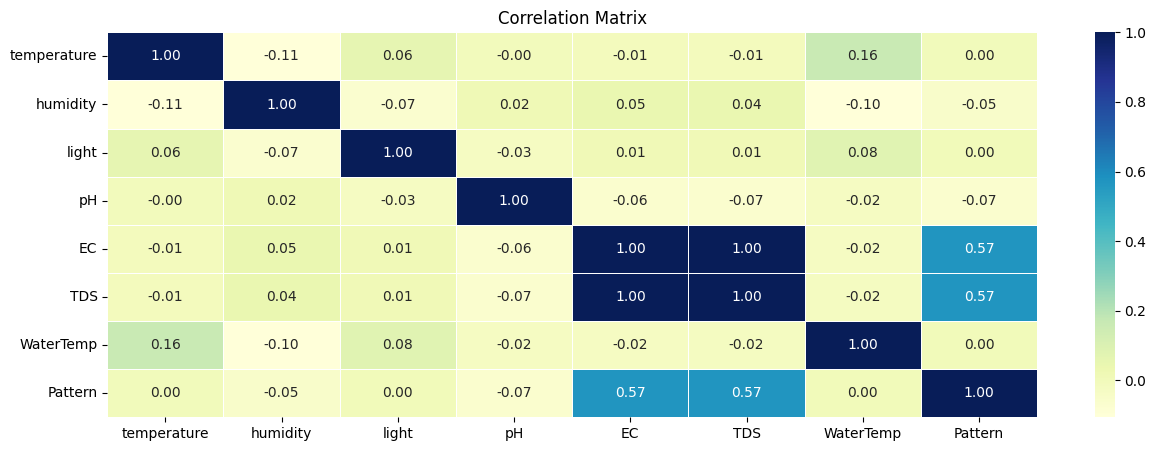

In [31]:
# Heatmap of the correlation matrix
plt.figure(figsize=(15, 5))
sns.heatmap(cor_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

EC dan TDS memiliki korelasi yang sangat baik yaitu Positif 1

## Data Preparation

#### Data PreProcessing

In [32]:
# Membuat fitur-fitur yang akan digunakan
fitur = ['temperature', 'humidity', 'light', 'pH', 'EC', 'TDS', 'WaterTemp']

# Mengganti nilai-nilai dalam DataFrame
X = df[fitur]

# Variabel Target
y = df['Pattern']

In [33]:
# Display first 5 rows
X.head()

,temperature,humidity,light,pH,EC,TDS,WaterTemp
0,25.5,67,17660,6.4,855,427,29.7
1,26.9,80,86930,6.7,929,464,27.0
2,25.7,77,23320,6.1,900,449,25.4
3,26.6,69,32280,6.7,887,443,26.1
4,25.8,65,41750,6.6,967,482,25.7


#### Split Data to Train and Test 80:20

In [34]:
# Memisahkan data menjadi data latih dan data uji dengan perbandingan 80% dan 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Menampilkan jumlah total sampel dalam dataset keseluruhan
print(f'Total # of sample in whole dataset: {len(X)}')

# Menampilkan jumlah total sampel dalam dataset latih
print(f'Total # of sample in train dataset: {len(X_train)}')

# Menampilkan jumlah total sampel dalam dataset uji
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 5005
Total # of sample in train dataset: 4004
Total # of sample in test dataset: 1001


### Standarisasi
Mengubah setiap fitur dalam data sehingga memiliki mean 0 dan standar deviasi 1.

In [36]:
# Memeriksa kolom-kolom non-numeric
kolom_non_numerik = X.select_dtypes(exclude=['float64', 'int64']).columns
print("Kolom non-numeric:", kolom_non_numerik)

Kolom non-numeric: Index([], dtype='object')


In [37]:
# Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Deployment

Dengan Default Parameter

In [45]:
# Train Models
models = {
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

In [46]:
# Dataframe untuk menyimpan hasil
results = pd.DataFrame(index=['train_mse', 'test_mse', 'eval_train', 'eval_test'],
                       columns=['Gradient Boosting Classifier', 'Random Forest', 'Support Vector Machine', 'K-Nearest Neighbors'])

In [48]:
# Classification Model Training and Evaluation
for name, model in models.items():
    # Assuming models is a dictionary containing your classifier instances
    model.fit(X_train_scaled, y_train)

    # Predict on training set
    y_train_pred = model.predict(X_train_scaled)
    # Calculate train MSE
    train_mse = mean_squared_error(y_train, y_train_pred)

    # Predict on test set
    y_test_pred = model.predict(X_test_scaled)
    # Calculate test MSE
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Store MSE results in the DataFrame
    results.loc['train_mse', name] = train_mse
    results.loc['test_mse', name] = test_mse

# Display train result
for column_name in results.columns:
    print(f"Model: {column_name} is trained.")

Model: Gradient Boosting Classifier is trained.
Model: Random Forest is trained.
Model: Support Vector Machine is trained.
Model: K-Nearest Neighbors is trained.


## Model Evaluation

### Display Akurasi masing masing model

In [49]:
results

,Gradient Boosting Classifier,Random Forest,Support Vector Machine,K-Nearest Neighbors
train_mse,0.071928,0.0,0.343407,0.241508
test_mse,0.097902,0.113886,0.358641,0.313686
eval_train,NaN,NaN,NaN,NaN
eval_test,NaN,NaN,NaN,NaN


<Axes: >

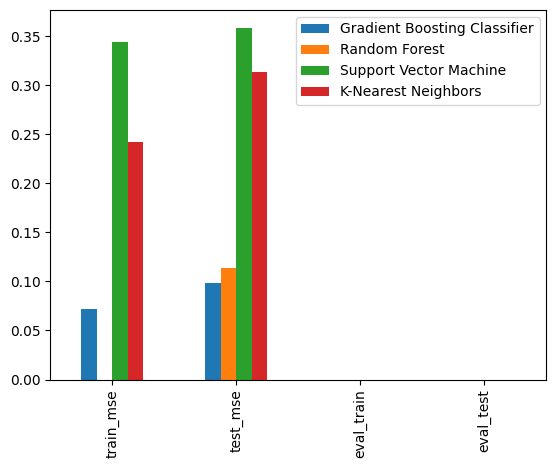

In [50]:
results.plot(kind='bar')

### Menambahkan Hyperparameter masing masing model

In [52]:
new_models = {
    "Gradient Boosting Classifier": GradientBoostingClassifier(learning_rate=0.1,max_depth=10),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=30),
    "Support Vector Machine": SVC(C=10.0, kernel='rbf', gamma='scale'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, weights='distance', p=1)
}

In [53]:
# Classification Model Training and Evaluation
for name, model in new_models.items():
    # Assuming models is a dictionary containing your classifier instances
    model.fit(X_train_scaled, y_train)

    # Predict on training set
    y_train_pred = model.predict(X_train_scaled)
    # Calculate train MSE
    train_mse = mean_squared_error(y_train, y_train_pred)

    # Predict on test set
    y_test_pred = model.predict(X_test_scaled)
    # Calculate test MSE
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Store MSE results in the DataFrame
    results.loc['eval_train', name] = train_mse
    results.loc['eval_test', name] = test_mse

In [54]:
results

,Gradient Boosting Classifier,Random Forest,Support Vector Machine,K-Nearest Neighbors
train_mse,0.071928,0.0,0.343407,0.241508
test_mse,0.097902,0.113886,0.358641,0.313686
eval_train,0.0,0.0,0.21978,0.0
eval_test,0.081918,0.115884,0.28971,0.245754


<Axes: >

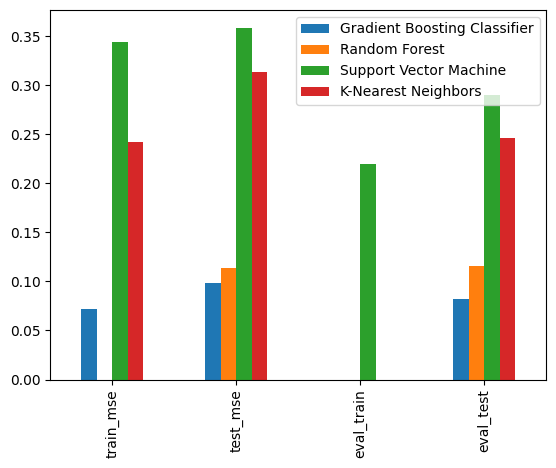

In [56]:
results.plot(kind='bar')